#Load the Train dataset

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Sandip029/MLOps/main/train.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Feature Engineering

In [ ]:
de = df.copy()

In [ ]:
de['Salutation'] = de['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
de[['Salutation','Name']]

,Salutation,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [ ]:
de['Salutation'].value_counts()

Salutation
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
de['Salutation'] = de['Salutation'].replace('Mme','Mrs')
de['Salutation'] = de['Salutation'].replace(['Mlle','Ms'],'Miss')

de['Salutation'].value_counts()

Salutation
Mr              517
Miss            185
Mrs             126
Master           40
Dr                7
Rev               6
Major             2
Col               2
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [ ]:
rare_titles = (de['Salutation'].value_counts() < 10)
rare_titles

Salutation
Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Major            True
Col              True
Don              True
Lady             True
Sir              True
Capt             True
the Countess     True
Jonkheer         True
Name: count, dtype: bool

In [ ]:
de['Salutation'] = de.Salutation.apply(lambda x: 'Rare' if rare_titles[x] else x)
de['Salutation'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [ ]:
age_title = de.groupby('Salutation')['Age'].median()

age_title

Salutation
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Rare      48.5
Name: Age, dtype: float64

In [ ]:
de['Family'] = de.Parch + de.SibSp

de['IsAlone'] = de['Family'] == 0

de['AvgFarePerFamily'] = round(de['Fare']/(de['Family']+1))

##Imputing Missing values in Age

In [ ]:
import numpy as np

de['Age'] = np.where(de['Age'].isnull(), age_title[de['Salutation']], de['Age'])

##Imputing Missing values in Embarked

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation for categorical columns (Embarked)
categorical_cols = ['Embarked']
mode_imputer = SimpleImputer(strategy='most_frequent')
de[categorical_cols] = mode_imputer.fit_transform(de[categorical_cols])

In [ ]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Cabin             204 non-null    object 
 11  Embarked          891 non-null    object 
 12  Salutation        891 non-null    object 
 13  Family            891 non-null    int64  
 14  IsAlone           891 non-null    bool   
 15  AvgFarePerFamily  891 non-null    float64
dtypes: bool(1), float64(3), int64(6), object(6)


In [ ]:
de.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              0
Salutation            0
Family                0
IsAlone               0
AvgFarePerFamily      0
dtype: int64

##Dropping insignificant columns

In [ ]:
# Dropping columns with too many missing values (Cabin)
de.drop(columns=['Cabin'], inplace=True)

# Dropping column Name
de.drop(columns=['Name'], inplace=True)

# Dropping column PassengerId
de.drop(columns=['PassengerId'], inplace=True)

#Dropping Ticket column as it isn't providing any extra insides
de.drop(columns=['Ticket'], inplace=True)

In [ ]:
de.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Family,IsAlone,AvgFarePerFamily
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,False,4.0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,False,36.0
2,1,3,female,26.0,0,0,7.9250,S,Miss,0,True,8.0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,1,False,27.0
4,0,3,male,35.0,0,0,8.0500,S,Mr,0,True,8.0


In [ ]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Sex               891 non-null    object 
 3   Age               891 non-null    float64
 4   SibSp             891 non-null    int64  
 5   Parch             891 non-null    int64  
 6   Fare              891 non-null    float64
 7   Embarked          891 non-null    object 
 8   Salutation        891 non-null    object 
 9   Family            891 non-null    int64  
 10  IsAlone           891 non-null    bool   
 11  AvgFarePerFamily  891 non-null    float64
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 77.6+ KB


In [ ]:
de.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
Salutation          0
Family              0
IsAlone             0
AvgFarePerFamily    0
dtype: int64

#Visualization

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
de['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [ ]:
# Count the number of survivors and non-survivors
survival_counts = de['Survived'].value_counts().sort_index()

# Create labels for the bars
labels = ['Did not survive', 'Survived']

# The counts for each category
counts = survival_counts.values

# Create the bar chart with specific colors for each bar
fig = go.Figure(data=[
    go.Bar(name='Did not survive', x=[labels[0]], y=[counts[0]], marker_color='red'),
    go.Bar(name='Survived', x=[labels[1]], y=[counts[1]], marker_color='green')
])

# Add titles and labels
fig.update_layout(
    title='Survival Counts on the Titanic',
    xaxis_title='Survival Status',
    yaxis_title='Count',
    bargap=0.2
)

# Show the figure
fig.show()

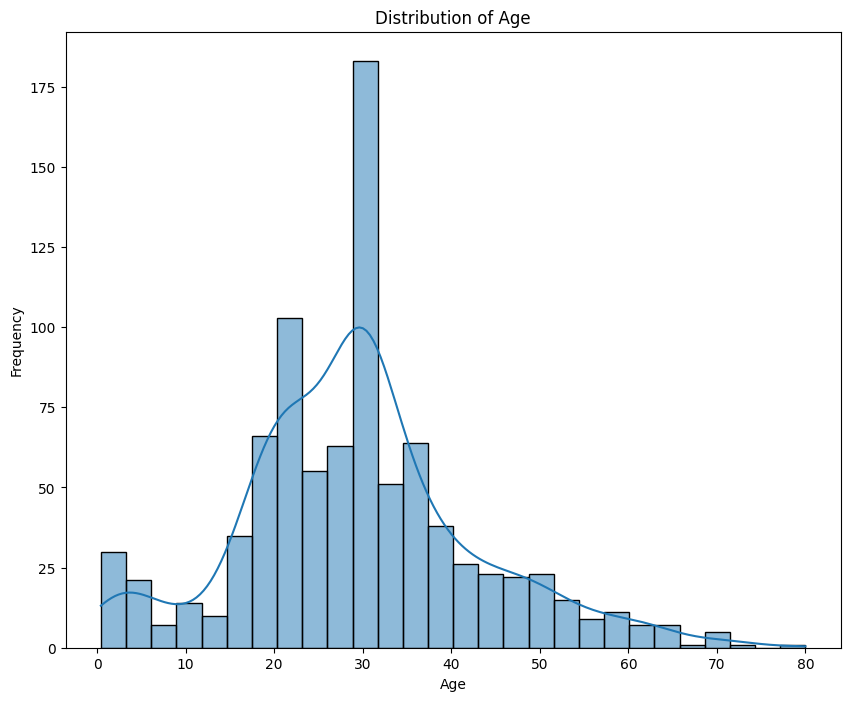

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(de['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

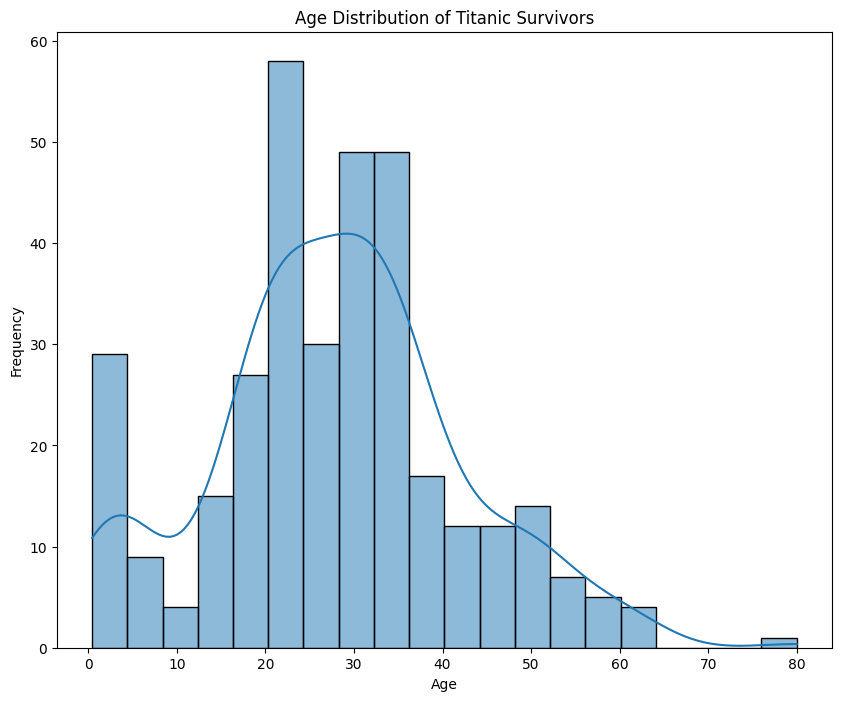

In [ ]:
# Filter the dataframe to include only the survivors
survivors_de = de[de['Survived'] == 1]

# Plot the age distribution of the survivors
plt.figure(figsize=(10, 8))
sns.histplot(survivors_de['Age'].dropna(), kde=True)  # Drop NA values to avoid errors
plt.title('Age Distribution of Titanic Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

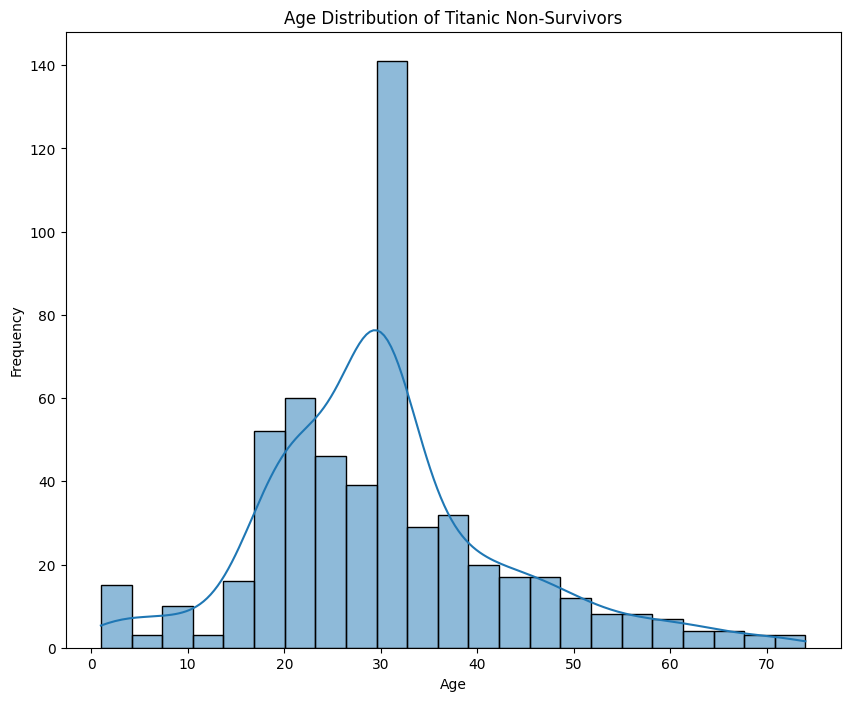

In [ ]:
# Filter the dataframe to include only the survivors
survivors_de = de[de['Survived'] == 0]

# Plot the age distribution of the non-survivors
plt.figure(figsize=(10, 8))
sns.histplot(survivors_de['Age'].dropna(), kde=True)  # Drop NA values to avoid errors
plt.title('Age Distribution of Titanic Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count the number of each sex
sex_counts = de['Sex'].value_counts()

# Create labels for the bars
labels = sex_counts.index.tolist()

# The counts for each category
counts = sex_counts.values

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Sex', x=labels, y=counts)
])

# Add titles and labels
fig.update_layout(
    title='Counts of Passengers by Sex',
    xaxis_title='Sex',
    yaxis_title='Count',
    bargap=0.2
)

# Show the figure
fig.show()

In [ ]:
# Group by 'Sex' and 'Survived' and count the occurrences
sex_survived_counts = de.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Extract counts for each category
male_survived = sex_survived_counts.loc['male', 1]
male_not_survived = sex_survived_counts.loc['male', 0]
female_survived = sex_survived_counts.loc['female', 1]
female_not_survived = sex_survived_counts.loc['female', 0]

# Labels and counts for the bar chart
labels = ['Male', 'Female']
survived_counts = [male_survived, female_survived]
not_survived_counts = [male_not_survived, female_not_survived]

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Did Not Survive', x=labels, y=not_survived_counts, marker_color='red'),
    go.Bar(name='Survived', x=labels, y=survived_counts, marker_color='green')
])

# Add titles and labels
fig.update_layout(
    title='Number of Survivors by Sex',
    xaxis_title='Sex',
    yaxis_title='Count',
    barmode='group',
    bargap=0.2
)

# Show the figure
fig.show()

In [ ]:
# Count the number of each Pclass
class_counts = de['Pclass'].value_counts()

# Create labels for the bars
labels = class_counts.index.tolist()

# The counts for each category
counts = class_counts.values

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Pclass', x=labels, y=counts)
])

# Add titles and labels
fig.update_layout(
    title='Counts of Passengers by Pclass',
    xaxis_title='Pclass',
    yaxis_title='Count',
    bargap=0.2
)

# Show the figure
fig.show()

In [ ]:
# Group by 'Pclass' and 'Survived' and count the occurrences
pclass_survived_counts = de.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Extract counts for each category
survived_counts = pclass_survived_counts[1]
not_survived_counts = pclass_survived_counts[0]

# Labels for the bar chart
labels = pclass_survived_counts.index.tolist()

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Survived', x=labels, y=survived_counts, marker_color='green'),
    go.Bar(name='Did Not Survive', x=labels, y=not_survived_counts, marker_color='red')
])

# Add titles and labels
fig.update_layout(
    title='Number of Survivors by Pclass',
    xaxis_title='Pclass',
    yaxis_title='Count',
    barmode='group',
    bargap=0.2
)

# Show the figure
fig.show()

In [ ]:
# Group by Embarked and count the number of occurrences
family_size_counts = de['Embarked'].value_counts().sort_index().reset_index()
family_size_counts.columns = ['Embarked', 'Count']

# Create a bar plot using Plotly
fig = px.bar(family_size_counts, x='Embarked', y='Count',
             title='Distribution of Embarked',
             labels={'Embarked': 'Embarked', 'Count': 'Number of Passengers'})

# Show the plot
fig.show()

In [ ]:
# Group by 'Embarked' and 'Survived' and count the occurrences
Embarked_survived_counts = de.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Extract counts for each category
survived_counts = Embarked_survived_counts[1]
not_survived_counts = Embarked_survived_counts[0]

# Labels for the bar chart
labels = Embarked_survived_counts.index.tolist()

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Survived', x=labels, y=survived_counts, marker_color='green'),
    go.Bar(name='Did Not Survive', x=labels, y=not_survived_counts, marker_color='red')
])

# Add titles and labels
fig.update_layout(
    title='Number of Survivors by Embarked',
    xaxis_title='Embarked',
    yaxis_title='Count',
    barmode='group',
    bargap=0.2
)

# Show the figure
fig.show()

In [ ]:
# Group by 'Salutation' and 'Survived' and count the occurrences
Salutation_survived_counts = de.groupby(['Salutation', 'Survived']).size().unstack(fill_value=0)

# Extract counts for each category
survived_counts = Salutation_survived_counts[1]
not_survived_counts = Salutation_survived_counts[0]

# Labels for the bar chart
labels = Salutation_survived_counts.index.tolist()

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(name='Survived', x=labels, y=survived_counts, marker_color='green'),
    go.Bar(name='Did Not Survive', x=labels, y=not_survived_counts, marker_color='red')
])

# Add titles and labels
fig.update_layout(
    title='Number of Survivors by Salutation',
    xaxis_title='Salutation',
    yaxis_title='Count',
    barmode='group',
    bargap=0.2
)

# Show the figure
fig.show()

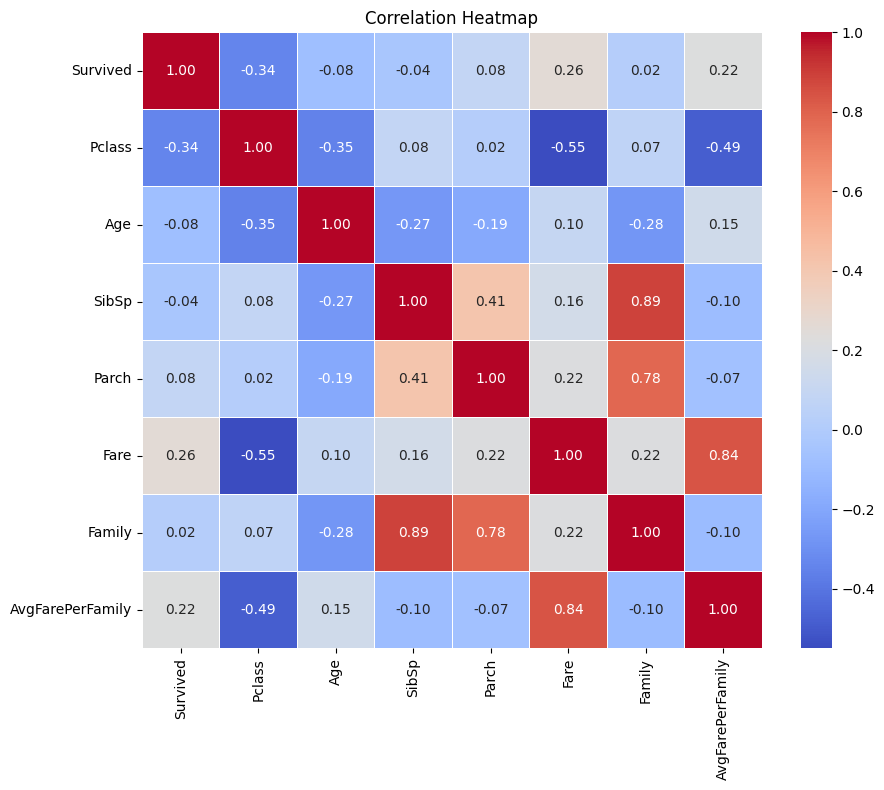

In [ ]:
numerical_features = de.select_dtypes(include=['int64', 'float64']).columns

# Visualize the correlation matrix
corr_matrix = de[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**High Multicollinearity between 'SibSp', 'Parch' and 'Family'. Also between 'Fare' and 'AvgFarePerFamily'**

#Association

In [ ]:
de[['Survived', 'Sex', 'Pclass']] = de[['Survived', 'Sex', 'Pclass']].astype('category')

In [ ]:
num_feat = ['int64','float64']
cat_cols = list(de.select_dtypes(exclude=num_feat))

cat_cols

['Survived', 'Pclass', 'Sex', 'Embarked', 'Salutation', 'IsAlone']

##Chi2_contingency

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

sindex=0
findex = 0
while findex < len(cat_cols)-1:
  sindex = findex + 1
  while sindex < len(cat_cols):
    chisqt = pd.crosstab(de[cat_cols].iloc[:,findex], de[cat_cols].iloc[:,sindex], margins=True)

    chi, p, dof, expected = chi2_contingency(chisqt)

    if p<0.05:
      print("Correlated ",cat_cols[findex],'with',cat_cols[sindex],'--','pval:',p)
    else: print("NOT Correlated ",cat_cols[findex],'with',cat_cols[sindex],'--','pval:',p)
    sindex = sindex + 1
  findex = findex + 1

Correlated  Survived with Pclass -- pval: 6.258462423531468e-20
Correlated  Survived with Sex -- pval: 1.0036732821369117e-55
Correlated  Survived with Embarked -- pval: 0.00022606281100844073
Correlated  Survived with Salutation -- pval: 5.03511609757091e-56
Correlated  Survived with IsAlone -- pval: 1.9340079186274333e-07
Correlated  Pclass with Sex -- pval: 0.009388562065790747
Correlated  Pclass with Embarked -- pval: 3.844789037041039e-22
Correlated  Pclass with Salutation -- pval: 2.670595985614631e-09
Correlated  Pclass with IsAlone -- pval: 0.01149114747282557
Correlated  Sex with Embarked -- pval: 0.04437269628077406
Correlated  Sex with Salutation -- pval: 1.5873195485693077e-182
Correlated  Sex with IsAlone -- pval: 6.097416631267194e-17
Correlated  Embarked with Salutation -- pval: 0.0009107207078791756
Correlated  Embarked with IsAlone -- pval: 0.0453359588736405
Correlated  Salutation with IsAlone -- pval: 3.882313208597137e-42


##Association_metrics

In [ ]:
! pip install association_metrics

In [ ]:
# Using association_metrics library
import association_metrics as am

# Convert object and bool columns to category columns
crv = de.apply(lambda x: x.astype("category") if x.dtype == "O" or x.dtype == "bool" else x)

# Initialize a CramersV object using the converted DataFrame
cramers_v = am.CramersV(crv)

# columns and index are the categorical variables of the passed
cfit = cramers_v.fit().round(2)
cfit

,Survived,Pclass,Sex,Embarked,Salutation,IsAlone
Survived,1.00,0.34,0.54,0.17,0.57,0.20
Pclass,0.34,1.00,0.14,0.26,0.20,0.14
Sex,0.54,0.14,1.00,0.12,0.99,0.30
Embarked,0.17,0.26,0.12,1.00,0.15,0.12
Salutation,0.57,0.20,0.99,0.15,1.00,0.50
IsAlone,0.20,0.14,0.30,0.12,0.50,1.00


In [ ]:
! pip install dython

            Survived    Pclass       Sex  Embarked  Salutation   IsAlone
Survived    1.000000  0.336684  0.540200  0.164085    0.565004  0.203367
Pclass      0.336684  1.000000  0.129690  0.258312    0.188600  0.135914
Sex         0.540200  0.129690  1.000000  0.110742    0.991858  0.303646
Embarked    0.164085  0.258312  0.110742  1.000000    0.129817  0.120132
Salutation  0.565004  0.188600  0.991858  0.129817    1.000000  0.499271
IsAlone     0.203367  0.135914  0.303646  0.120132    0.499271  1.000000


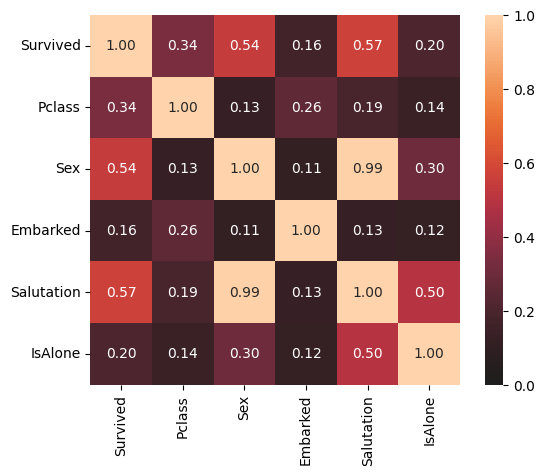

In [ ]:
from dython.nominal import associations
assoc = associations(de[['Survived', 'Pclass', 'Sex', 'Embarked', 'Salutation', 'IsAlone']], plot=False,)

print(assoc['corr'])

**High Multicollinearity between 'Sex' and 'Salutation'**

##ANOVA

In [ ]:
num_feat = ['int64','float64']
num_cols = list(de.select_dtypes(include=num_feat))
num_cols.pop(0)

num_cols

['SibSp', 'Parch', 'Fare', 'Family', 'AvgFarePerFamily']

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for num_col in num_cols:
    model = ols(num_col + '~' + 'Survived', data = de).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

             df       sum_sq   mean_sq         F    PR(>F)
Survived    1.0     1.350336  1.350336  1.110572  0.292244
Residual  889.0  1080.928003  1.215892       NaN       NaN
             df      sum_sq   mean_sq         F    PR(>F)
Survived    1.0    3.853142  3.853142  5.963464  0.014799
Residual  889.0  574.404995  0.646125       NaN       NaN
             df        sum_sq        mean_sq          F        PR(>F)
Survived    1.0  1.455089e+05  145508.887663  63.030764  6.120189e-15
Residual  889.0  2.052290e+06    2308.537576        NaN           NaN
             df       sum_sq   mean_sq         F    PR(>F)
Survived    1.0     0.641445  0.641445  0.246193  0.619891
Residual  889.0  2316.249688  2.605455       NaN       NaN
             df        sum_sq       mean_sq          F        PR(>F)
Survived    1.0  5.621504e+04  56215.043795  45.974929  2.181685e-11
Residual  889.0  1.087009e+06   1222.732578        NaN           NaN


##Treating Multicollinearity

In [ ]:
# Drop 'Family' column
de.drop('Family', axis=1, inplace=True)

# Drop 'AvgFarePerFamily' column
de.drop('AvgFarePerFamily', axis=1, inplace=True)

# Drop 'Sex' column
de.drop('Sex', axis=1, inplace=True)

#Encoding

In [ ]:
num_feat = ['int64','float64']
num_cols = list(de.select_dtypes(include=num_feat))
num_cols.pop(0)

num_cols

['SibSp', 'Parch', 'Fare']

In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import OneHotEncoder

# Convert categorical columns to 'category' type
cat_cols = ['Pclass', 'Embarked', 'Salutation', 'IsAlone']
for col in cat_cols:
    de[col] = de[col].astype('category')

# Separate features and target
red_feat = ['Survived']
featX = de.drop(labels=red_feat, axis=1)
targY = de['Survived']

# Initialize and fit OneHotEncoder
ohe = OneHotEncoder(cols=cat_cols, use_cat_names=True)

# Fit the encoder to the categorical columns and transform the features
featX_encoded = ohe.fit_transform(featX)

# Combine the encoded categorical features with numerical features
featX_final = pd.concat([featX_encoded, featX[num_cols]], axis=1)

print(featX_final)

     Pclass_3.0  Pclass_1.0  Pclass_2.0   Age  SibSp  Parch     Fare  \
0             1           0           0  22.0      1      0   7.2500   
1             0           1           0  38.0      1      0  71.2833   
2             1           0           0  26.0      0      0   7.9250   
3             0           1           0  35.0      1      0  53.1000   
4             1           0           0  35.0      0      0   8.0500   
..          ...         ...         ...   ...    ...    ...      ...   
886           0           0           1  27.0      0      0  13.0000   
887           0           1           0  19.0      0      0  30.0000   
888           1           0           0  21.0      1      2  23.4500   
889           0           1           0  26.0      0      0  30.0000   
890           1           0           0  32.0      0      0   7.7500   

     Embarked_S  Embarked_C  Embarked_Q  Salutation_Mr  Salutation_Mrs  \
0             1           0           0              1       

#Feature Selection

##SelectKBest with F-statistics

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fS = SelectKBest(k='all', score_func=f_regression)
fS.fit(featX_final, targY.values.ravel())

SelectKBest(k='all', score_func=<function f_regression at 0x7ea24efd79a0>)

In [ ]:
# Get the indices of the top k features
top_feature_indices = fS.get_support(indices=True)

# Get the names of the top k features
top_feature_names = featX_final.columns[top_feature_indices]

# Get the F-statistics and p-values of the top k features
top_f_stats = fS.scores_[top_feature_indices]
top_p_values = fS.pvalues_[top_feature_indices]

# Create a DataFrame to display the top k features along with their F-statistics and p-values
results_df = pd.DataFrame({'Feature': top_feature_names, 'F-Statistic': top_f_stats, 'p-value': top_p_values})

# Sort the DataFrame by F-statistics in descending order
results_df_sorted = results_df.sort_values(by='F-Statistic', ascending=False)

# Print the sorted DataFrame without indices
print(results_df_sorted.to_string(index=False))

          Feature  F-Statistic      p-value
    Salutation_Mr   383.945495 2.428783e-71
   Salutation_Mrs   117.749079 7.552395e-26
  Salutation_Miss   112.860827 6.694006e-25
       Pclass_3.0   103.057599 5.510281e-23
       Pclass_1.0    79.136403 3.190582e-18
             Fare    63.030764 6.120189e-15
             Fare    63.030764 6.120189e-15
     IsAlone_True    38.353651 9.009490e-10
    IsAlone_False    38.353651 9.009490e-10
       Embarked_C    25.895987 4.397151e-07
       Embarked_S    20.374460 7.223241e-06
       Pclass_2.0     7.814805 5.293655e-03
Salutation_Master     6.503635 1.093211e-02
            Parch     5.963464 1.479925e-02
            Parch     5.963464 1.479925e-02
              Age     5.573306 1.845129e-02
            SibSp     1.110572 2.922439e-01
            SibSp     1.110572 2.922439e-01
  Salutation_Rare     0.129191 7.193579e-01
       Embarked_Q     0.011846 9.133532e-01


##SelectKBest with mutual_info_regression

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fS = SelectKBest(k='all', score_func=mutual_info_regression)
fS.fit(featX_final, targY.values.ravel())

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7ea24f0024d0>)

In [ ]:
# Get the selected features
selected_features_indices = fS.get_support(indices=True)
selected_features = featX_final.columns[selected_features_indices]

# Get the mutual information scores
mutual_info_scores = fS.scores_

# Create a Series with feature names as indices
mutual_info_series = pd.Series(mutual_info_scores, index=featX_final.columns, name='Mutual Information')

# Sort the mutual information scores in descending order
mutual_info_sorted = mutual_info_series[selected_features].sort_values(ascending=False)

# Print the sorted mutual information scores
print(mutual_info_sorted)

Salutation_Mr        0.160562
Fare                 0.140010
Fare                 0.140010
Fare                 0.129758
Fare                 0.129758
Salutation_Miss      0.103502
Salutation_Mrs       0.071424
Pclass_1.0           0.063741
Parch                0.051212
Parch                0.051212
Age                  0.046374
Pclass_3.0           0.043747
SibSp                0.027418
SibSp                0.027418
Embarked_S           0.016770
Pclass_2.0           0.011837
Salutation_Rare      0.003554
Parch                0.001484
Parch                0.001484
Embarked_C           0.000000
Embarked_Q           0.000000
Salutation_Master    0.000000
IsAlone_False        0.000000
IsAlone_True         0.000000
SibSp                0.000000
SibSp                0.000000
Name: Mutual Information, dtype: float64


In [ ]:
featX_final.head()

,Pclass_3.0,Pclass_1.0,Pclass_2.0,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Salutation_Mr,Salutation_Mrs,Salutation_Miss,Salutation_Master,Salutation_Rare,IsAlone_False,IsAlone_True,SibSp,Parch,Fare
0,1,0,0,22.0,1,0,7.2500,1,0,0,1,0,0,0,0,1,0,1,0,7.2500
1,0,1,0,38.0,1,0,71.2833,0,1,0,0,1,0,0,0,1,0,1,0,71.2833
2,1,0,0,26.0,0,0,7.9250,1,0,0,0,0,1,0,0,0,1,0,0,7.9250
3,0,1,0,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,1,0,53.1000
4,1,0,0,35.0,0,0,8.0500,1,0,0,1,0,0,0,0,0,1,0,0,8.0500


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fS = SelectKBest(k=12, score_func=f_regression)
fS.fit(featX_final, targY.values.ravel())

# Get the indices of the top k features
top_feature_indices = fS.get_support(indices=True)

# Get the names of the top k features
top_feature_names = featX_final.columns[top_feature_indices]

# Get the F-statistics and p-values of the top k features
top_f_stats = fS.scores_[top_feature_indices]
top_p_values = fS.pvalues_[top_feature_indices]

# Create a DataFrame to display the top k features along with their F-statistics and p-values
results_df = pd.DataFrame({'Feature': top_feature_names, 'F-Statistic': top_f_stats, 'p-value': top_p_values})

# Sort the DataFrame by F-statistics in descending order
results_df_sorted = results_df.sort_values(by='F-Statistic', ascending=False)

# Print the sorted DataFrame without indices
print(results_df_sorted.to_string(index=False))

        Feature  F-Statistic      p-value
  Salutation_Mr   383.945495 2.428783e-71
 Salutation_Mrs   117.749079 7.552395e-26
Salutation_Miss   112.860827 6.694006e-25
     Pclass_3.0   103.057599 5.510281e-23
     Pclass_1.0    79.136403 3.190582e-18
           Fare    63.030764 6.120189e-15
           Fare    63.030764 6.120189e-15
   IsAlone_True    38.353651 9.009490e-10
  IsAlone_False    38.353651 9.009490e-10
     Embarked_C    25.895987 4.397151e-07
     Embarked_S    20.374460 7.223241e-06
     Pclass_2.0     7.814805 5.293655e-03


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fS = SelectKBest(k=12, score_func=mutual_info_regression)
fS.fit(featX_final, targY.values.ravel())

# Get the selected features
selected_features_indices = fS.get_support(indices=True)
selected_features = featX_final.columns[selected_features_indices]

# Get the mutual information scores
mutual_info_scores = fS.scores_

# Create a Series with feature names as indices
mutual_info_series = pd.Series(mutual_info_scores, index=featX_final.columns, name='Mutual Information')

# Sort the mutual information scores in descending order
mutual_info_sorted = mutual_info_series[selected_features].sort_values(ascending=False)

# Print the sorted mutual information scores
print(mutual_info_sorted)

Salutation_Mr      0.164220
Fare               0.134838
Fare               0.134838
Salutation_Miss    0.129824
Fare               0.117144
Fare               0.117144
Salutation_Mrs     0.062429
Pclass_1.0         0.060183
Pclass_3.0         0.058029
Parch              0.041941
Age                0.035381
Pclass_2.0         0.033330
IsAlone_False      0.031336
Salutation_Rare    0.019345
Parch              0.000000
Name: Mutual Information, dtype: float64


#Pipeline

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

##Creating a Preprocessing_pipeline

In [ ]:
# Function to extract salutation from the name
def extract_salutation(df):
    df = df.copy()
    df['Salutation'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
    df['Salutation'] = df['Salutation'].replace('Mme', 'Mrs')
    df['Salutation'] = df['Salutation'].replace(['Mlle', 'Ms'], 'Miss')

    rare_titles = (df['Salutation'].value_counts() < 10)
    df['Salutation'] = df['Salutation'].apply(lambda x: 'Rare' if rare_titles[x] else x)
    return df

# Function to impute age based on salutation
def impute_age(df):
    df = df.copy()
    age_title = df.groupby('Salutation')['Age'].median()
    df['Age'] = np.where(df['Age'].isnull(), df['Salutation'].map(age_title), df['Age'])
    return df

# Function to create 'IsAlone' feature
def create_is_alone(df):
    df = df.copy()
    df['Family'] = df['SibSp'] + df['Parch']
    df['IsAlone'] = (df['Family'] == 0).astype(int)
    return df

# Function to drop unnecessary columns
def drop_columns(df):
    df = df.copy()
    df.drop(columns=['Cabin', 'Name', 'PassengerId', 'Ticket', 'Sex', 'Parch', 'Family'], inplace=True)
    return df

In [ ]:
# Function transformers
extract_salutation_transformer = FunctionTransformer(extract_salutation, validate=False)
impute_age_transformer = FunctionTransformer(impute_age, validate=False)
create_is_alone_transformer = FunctionTransformer(create_is_alone, validate=False)
drop_columns_transformer = FunctionTransformer(drop_columns, validate=False)

In [ ]:
# Define numeric features
numeric_features = ['Age', 'SibSp', 'Fare', 'Pclass']

# Define categorical features
categorical_features = ['Embarked', 'Salutation', 'IsAlone']

# Define numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Define categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine numeric and categorical transformers
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

##Sending the Train dataset through the Preprocessing and Model Pipeline with RFE

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.2, n_estimators=100, max_depth=3),
}

df = extract_salutation(df)
df = impute_age(df)
df = create_is_alone(df)
df = drop_columns(df)

# Separate features and target
X = df.drop(columns='Survived')
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and store each model
fitted_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessing_pipeline),
        ('rfe', RFE(estimator=model, n_features_to_select=6)),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    fitted_models[name] = pipeline

# Evaluate each model on the test data
for name, pipeline in fitted_models.items():
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

Logistic Regression - Accuracy: 0.7989, F1 Score: 0.7429
Random Forest - Accuracy: 0.7989, F1 Score: 0.7534
Gradient Boosting - Accuracy: 0.8436, F1 Score: 0.8028


**The Best model according to "Train" dataset is Gradient Boosting - Accuracy: 0.8436, F1 Score: 0.8028**

Text(0.5, 1.05, 'Confusion_matrix')

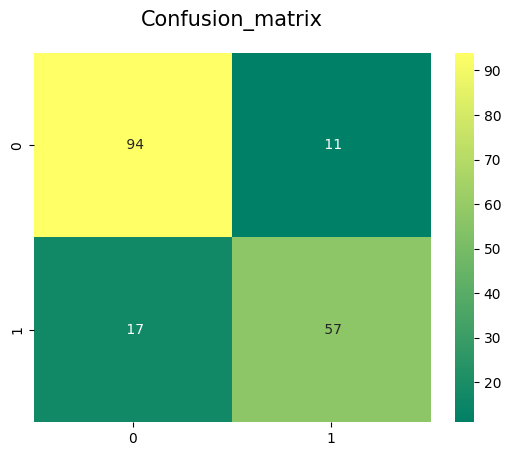

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

#Load the Test dataset and Result

In [ ]:
url = 'https://raw.githubusercontent.com/Sandip029/MLOps/main/test.csv'

df_test = pd.read_csv(url)

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
url = 'https://raw.githubusercontent.com/Sandip029/MLOps/main/gender_submission.csv'

y = pd.read_csv(url)

In [ ]:
y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
y.drop(columns=['PassengerId'], inplace=True)

##Sending the Test datset through the Pipelines

In [ ]:
df_test = extract_salutation(df_test)
df_test = impute_age(df_test)
df_test = create_is_alone(df_test)
df_test = drop_columns(df_test)

# Separate features and target for test data
X_test = df_test
y_test = y

# Use only the Gradient Boosting model to predict on df_test
if 'Gradient Boosting' in fitted_models:
    gradient_boosting_pipeline = fitted_models['Gradient Boosting']
    y_pred = gradient_boosting_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

Gradient Boosting - Accuracy: 0.8828, F1 Score: 0.8361


**Gradient Boosting model performance on the "Test" dataset - Accuracy: 0.8828, F1 Score: 0.8361**

Text(0.5, 1.05, 'Confusion_matrix')

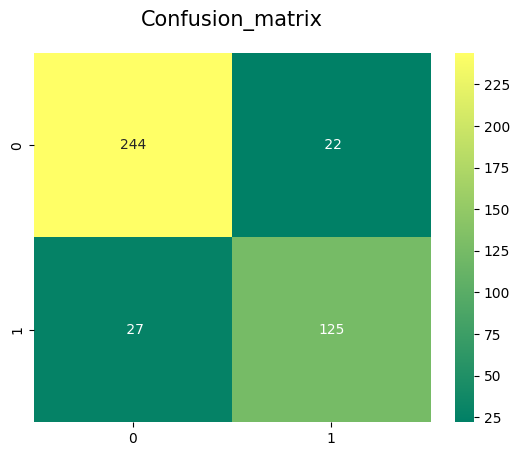

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)